<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 논리연산자 구현하기


In [ ]:
def AND1(x1,x2):
  if x1==0 and x2==0: return 0
  if x1==0 and x2==1: return 0
  if x1==1 and x2==0: return 0
  return 1


In [ ]:
x = [(0,0),(0,1),(1,0),(1,1)]
for i in x:
  print(f"{i} => {AND1(i[0],i[1])}")

(0, 0) => 0
(0, 1) => 0
(1, 0) => 0
(1, 1) => 1


In [ ]:
def AND2(x1,x2):
  w1,w2,th= 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <=th:
    return 0
  return 1

In [ ]:
for i in x:
  print(f"{i} => {AND2(i[0],i[1])}")

(0, 0) => 0
(0, 1) => 0
(1, 0) => 0
(1, 1) => 1


In [ ]:
def OR(x1,x2):
  w1,w2,th= 0.5, 0.5, 0.4
  tmp = x1*w1 + x2*w2
  if tmp <= th:
    return 0
  return 1

In [ ]:
for i in x:
  print(f"{i} => {OR(i[0],i[1])}")

(0, 0) => 0
(0, 1) => 1
(1, 0) => 1
(1, 1) => 1


---------------
딥러닝은 w1,w2,th값을 스스로 학습을 통해 도출한다.


In [7]:
import numpy as np
a = np.array([2,3])
b = np.array([4,5])
c = np.sum(a*b)
print(c)

23


In [ ]:
def AND3(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7
  tmp = np.sum(w*x)+b
  if tmp > 0 :
    return 1
  return 0

In [ ]:
for i in x:
  print(f"{i} => {AND3(i[0],i[1])}")

(0, 0) => 0
(0, 1) => 0
(1, 0) => 0
(1, 1) => 1


In [ ]:
def NAND(x1,x2):
  tmp =AND3(x1,x2)
  if tmp==1: return 0
  return 1

In [ ]:
for i in x:
  print(f"{i} => {NAND(i[0],i[1])}")

(0, 0) => 1
(0, 1) => 1
(1, 0) => 1
(1, 1) => 0


In [ ]:
def XOR(x1,x2):
  tmp1 = NAND(x1,x2)
  tmp2 = OR(x1,x2)
  return AND(tmp1,tmp2)

In [ ]:
for i in x:
  print(f"{i} => {XOR(i[0],i[1])}")

(0, 0) => 0
(0, 1) => 1
(1, 0) => 1
(1, 1) => 0


-------------------
XOR연산은 AND(NAND,OR)임 -> 연산 3번

In [ ]:
#균등(균일)분포
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__


'2.3.0'

In [ ]:
#균일 분포로 0~1범위의 랜덤값 생성
random_uniform = tf.random.uniform([10000], minval = 0, maxval=1)
random_uniform

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.89932525, 0.72436   , 0.59483683, ..., 0.75755286, 0.69872916,
       0.08148992], dtype=float32)>

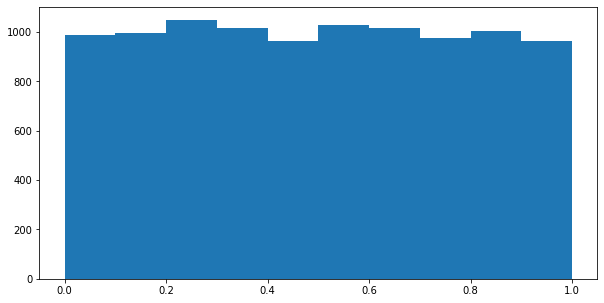

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(random_uniform)
plt.show()

In [ ]:
#정규분포
random_norm = tf.random.normal([10000])

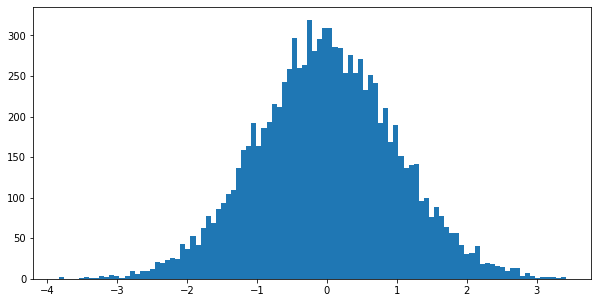

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(random_norm,bins=100)
plt.show()

In [ ]:
#활성화 함수 sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))

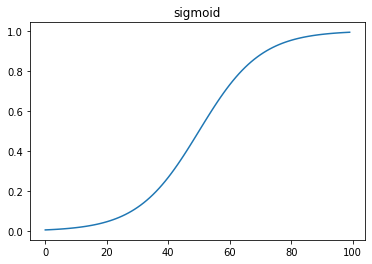

In [ ]:
plt.plot(sigmoid(np.arange(-5.0,5.0,0.1)))
plt.title("sigmoid")
plt.show()

In [ ]:
#활성화 함수 relu
def relu(x):
  return np.maximum(0,x)

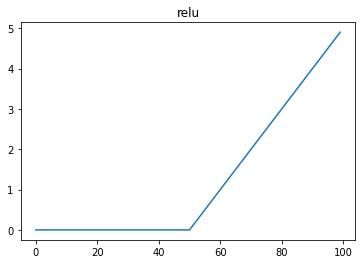

In [ ]:
plt.plot(relu(np.arange(-5.0,5.0,0.1)))
plt.title("relu")
plt.show()

In [ ]:
import math
def tanh(x):
  return [math.tanh(xx) for xx in x]

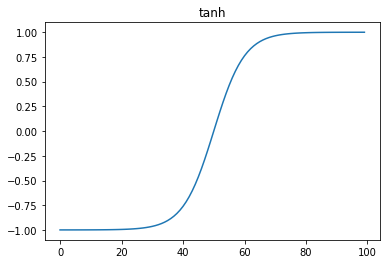

In [ ]:
plt.plot(tanh(np.arange(-5.0,5.0,0.1)))
plt.title("tanh")
plt.show()

In [ ]:
x,y = 0,1
w = tf.random.normal([1],0,1)
error = 987654321
for i in range(10000):
  output = sigmoid(x*w)#sigmoid(0) = 0.5, y=1 -> error 는 계속 0.5일 수 밖에 없음
  error = y-output
  w =w+x*0.1*error
  if i%1000 == 999:
    print(f"{i}. error: {error},output: {output}")

999. error: [0.5],output: [0.5]
1999. error: [0.5],output: [0.5]
2999. error: [0.5],output: [0.5]
3999. error: [0.5],output: [0.5]
4999. error: [0.5],output: [0.5]
5999. error: [0.5],output: [0.5]
6999. error: [0.5],output: [0.5]
7999. error: [0.5],output: [0.5]
8999. error: [0.5],output: [0.5]
9999. error: [0.5],output: [0.5]


-----------
sigmoid(0) = 0.5, y=1 -> error 는 계속 0.5일 수 밖에 없음


이러한 경우 w가 갱신이 안됨


## AND

In [ ]:
#경사하강법
x,y = 0,1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1) #편향 추가
error = 987654321
for i in range(10000):
  output = sigmoid(x*w+1*b)#sigmoid의 입력값이 0이 되지 않도록
  error = y-output
  w =w+x*0.1*error
  b= b+1*0.1*error
  if i%1000 == 999:
    print(f"{i}. error: {error},output: {output}. w:{w}, b:{b}")

999. error: [0.00993836],output: [0.99006164]. w:[0.42719138], b:[4.602362]
1999. error: [0.00500083],output: [0.9949992]. w:[0.42719138], b:[5.293623]
2999. error: [0.00333798],output: [0.996662]. w:[0.42719138], b:[5.6993628]
3999. error: [0.00250441],output: [0.9974956]. w:[0.42719138], b:[5.9874663]
4999. error: [0.00200361],output: [0.9979964]. w:[0.42719138], b:[6.210985]
5999. error: [0.0016697],output: [0.9983303]. w:[0.42719138], b:[6.3936214]
6999. error: [0.00143111],output: [0.9985689]. w:[0.42719138], b:[6.5480356]
7999. error: [0.00125217],output: [0.9987478]. w:[0.42719138], b:[6.68179]
8999. error: [0.00111288],output: [0.9988871]. w:[0.42719138], b:[6.7997622]
9999. error: [0.00100154],output: [0.99899846]. w:[0.42719138], b:[6.9052844]


In [ ]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y= np.array([[1],[0],[0],[0]])

w= tf.random.normal([2],0,1) # 항이 2개 이므로 (상수항 제외)
b = tf.random.normal([1],0,1) #상수항(편향)
for i in range(10000):
  for j in range(4):
    sum = np.sum(x[j]*w)
    output = sigmoid(sum+b) 
    error = y[j][0]-output #loss
    b= b+0.1*error  #0.1:학습률
    w = w+x[j]*0.1*error  #0.1:학습률
  if i%1000 == 999:
    print(f"{i}.--------------- \t error: {np.round(error,2)} \t output: {np.round(output,2)} \t w:{w} \t b:{b}")

999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[5.5425434 5.5487633] 	 b:[-8.504256]
1999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[6.950348 6.95352 ] 	 b:[-10.604713]
2999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[7.7778788 7.779999 ] 	 b:[-11.842305]
3999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[8.364522 8.366108] 	 b:[-12.720371]
4999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[8.81882  8.820083] 	 b:[-13.400737]
5999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[9.189517 9.190567] 	 b:[-13.956059]
6999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[9.50256  9.503458] 	 b:[-14.425114]
7999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[9.773443 9.774232] 	 b:[-14.831058]
8999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[10.012163 10.012865] 	 b:[-15.188842]
9999.--------------- 	 error: [-0.] 	 output: [0.] 	 w:[10.225536 10.226168] 	 b:[-15.508663]


In [ ]:
for i in range(4):
  print(f"{x[i]} => {sigmoid(np.sum(x[i]*w)+b)}")

[1 1] => [0.99291766]
[1 0] => [0.00505089]
[0 1] => [0.00505407]
[0 0] => [1.839387e-07]


## OR

In [ ]:
x= np.array([[1,1],[1,0],[0,1],[0,0]])
y= np.array([[1],[1],[1],[0]])
for i in range(10000):
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b)
    error = y[j][0]-output
    w = w+0.1*error*x[j]
    b = b+0.1*error
  if i%1000 == 999:
    print(f"{i}.--------------- \t error: {np.round(error,2)} \t output: {np.round(output,2)} \t w:{w} \t b:{b}")

999.--------------- 	 error: [-0.05] 	 output: [0.05] 	 w:[6.7893696 6.7854433] 	 b:[-2.9201386]
1999.--------------- 	 error: [-0.03] 	 output: [0.03] 	 w:[8.210568 8.208573] 	 b:[-3.6392615]
2999.--------------- 	 error: [-0.02] 	 output: [0.02] 	 w:[9.039858  9.0385275] 	 b:[-4.0566206]
3999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[9.626515 9.625518] 	 b:[-4.351282]
4999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[10.080487 10.079689] 	 b:[-4.5790486]
5999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[10.450728 10.450061] 	 b:[-4.764685]
6999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[10.763311 10.762739] 	 b:[-4.9213443]
7999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[11.033758 11.033258] 	 b:[-5.0568423]
8999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[11.272079 11.271635] 	 b:[-5.1762147]
9999.--------------- 	 error: [-0.01] 	 output: [0.01] 	 w:[11.485089 11.484691] 	 b:[-5.282891]


In [ ]:
for i in x:
  print(f"{i} => {sigmoid(np.sum(i*w)+b)}")

[1 1] => [1.]
[1 0] => [0.9979791]
[0 1] => [0.9979784]
[0 0] => [0.00505208]


## XOR

In [ ]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y= np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
for i in range(10000):
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b)
    error = y[j][0]-output
    w = w+0.1*error*x[j]
    b = b+0.1*error
  if i%1000 == 999:
    print(f"{i}.--------------- \t error: {np.round(error,2)} \t output: {np.round(output,2)} \t w:{w} \t b:{b}")

999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
1999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
2999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
3999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
4999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
5999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
6999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
7999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
8999.--------------- 	 error: [-0.51] 	 output: [0.51] 	 w:[5.1281884e-02 1.1548400e-07] 	 b:[-1.527369e-07]
9999.---------------

In [ ]:
for i in x:
  print(f"{i} => {sigmoid(np.sum(i*w)+b)}")

[1 1] => [0.5128176]
[1 0] => [0.5128176]
[0 1] => [0.5]
[0 0] => [0.5]


## Keras로 XOR구현

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, activation = 'sigmoid',input_shape=(2,)))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse')
history= model.fit(x, y,
          epochs=5000,
          verbose=2,
          batch_size=1
          )

In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-9.329432,  9.246181],
        [-5.192651, -3.116655]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([0.96906257, 1.7730567 ], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-6.9260726],
        [-5.086893 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([5.076568], dtype=float32)>]

------
- 1 layer: weights 2쌍이 들어감(2units) + bias 2개(1쌍에 하나니까) 
- 2 layer: input 1쌍이 들어감(2units에서 나온 두개) + bias 1개


In [ ]:
history.history.keys()

dict_keys(['loss'])

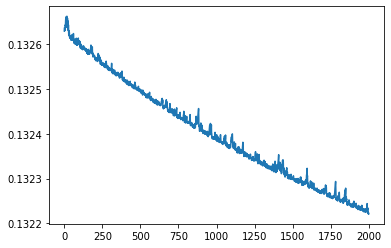

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
model.predict(x)

array([[0.50183916],
       [0.49995315],
       [0.9701377 ],
       [0.02090287]], dtype=float32)

In [ ]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [3]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

Text(0.3, 0.3, '한글')

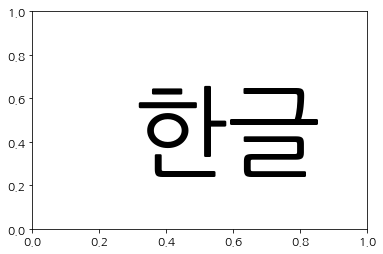

In [5]:
plt.text(0.3, 0.3, '한글', size=100)

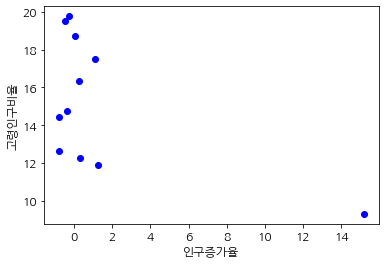

In [4]:
#인구증가율
pop_inc = [0.3,-0.78,1.26,0.03,1.11,15.17,0.24,-0.24,-0.47,-0.77,-0.37]
#고령인구비율
pop_old = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74]
plt.plot(pop_inc, pop_old,'bo')
plt.xlabel("인구증가율")
plt.ylabel("고령인구비율")
plt.show()

In [21]:
#최소 제곱법

#인구증가율
x = [0.3,-0.78,1.26,0.03,1.11,15.17,0.24,-0.24,-0.47,-0.77,-0.37]
x = x[:5] + x[6:]
#고령인구비율
y = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74]
y = y[:5]+y[6:]

x_bar = np.sum(x)/len(x)
y_bar = np.sum(y)/len(y)
#기울기 a = (x-x평균)(y-y평균)의 합 / (x-x평균)의 제곱의 합
#절편 b= y평균-(x평균*a)
a = np.sum([(y_-y_bar)*(x_-x_bar) for y_,x_ in list(zip(y,x))])
a /= np.sum([(x_-x_bar) for x_ in x])
b = y_bar -x_bar*a
#원래값 - output이 0에 가까워져야함 
#y= a*x + b

In [20]:
a

-2.426179191257036e+16

In [13]:
type(x)

numpy.ndarray

In [19]:
x[0]

0.3

In [24]:
def compute_loss(x,y): #최소제곱법
  y_pred = a*x+b
  loss = tf.reduce_mean((y-y_pred)**2)
  return loss

In [27]:
for i,j in zip(x,y):
  print(compute_loss(i,j))

tf.Tensor(4.259418444163619e+31, shape=(), dtype=float64)
tf.Tensor(3.871573027616731e+32, shape=(), dtype=float64)
tf.Tensor(8.890977535165279e+32, shape=(), dtype=float64)
tf.Tensor(5.886345468087439e+26, shape=(), dtype=float64)
tf.Tensor(6.853124734112993e+32, shape=(), dtype=float64)
tf.Tensor(2.571214563915801e+31, shape=(), dtype=float64)
tf.Tensor(4.322990975218976e+31, shape=(), dtype=float64)
tf.Tensor(1.477478598835717e+32, shape=(), dtype=float64)
tf.Tensor(3.776685138671144e+32, shape=(), dtype=float64)
tf.Tensor(9.465302376141225e+31, shape=(), dtype=float64)


In [49]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

x = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]
x = x[:5] + x[6:]

# 고령인구비율
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]
y = y[:5] + y[6:]

a =  tf.Variable(random.random()) # 기울기 랜덤값
b =  tf.Variable(random.random()) # 절편 랜덤값

def compute_loss(): # a * x + b를 구해서 y값을 뺀후 가장 작아지는 값 찾기
  y_pred = a * x + b
  loss = tf.reduce_mean((y-y_pred)**2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(2000):
  optimizer.minimize(compute_loss, var_list=[a,b])
  if i % 100 == 99:
    print("{},{},{}".format(i, a.numpy(), compute_loss().numpy()))

99,0.012176942080259323,85.37644958496094
199,-0.2932167053222656,26.91510009765625
299,-0.46774211525917053,11.23845100402832
399,-0.548215389251709,8.434603691101074
499,-0.5776890516281128,8.106793403625488
599,-0.5862908959388733,8.081781387329102
699,-0.5882954597473145,8.080541610717773
799,-0.5886669754981995,8.080501556396484
899,-0.5887211561203003,8.080501556396484
999,-0.5887264013290405,8.080501556396484
1099,-0.5887264609336853,8.0805025100708
1199,-0.5887264609336853,8.0805025100708
1299,-0.5887264609336853,8.0805025100708
1399,-0.5887264609336853,8.0805025100708
1499,-0.5887264609336853,8.0805025100708
1599,-0.5887264609336853,8.0805025100708
1699,-0.5887262225151062,8.080499649047852
1799,-0.5887266993522644,8.0805025100708
1899,-0.5887266397476196,8.080500602722168
1999,-0.588726282119751,8.080501556396484


In [71]:
x = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]
x = x[:5] + x[6:]

# 고령인구비율
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]
y = y[:5] + y[6:]

model = tf.keras.Sequential([
       tf.keras.layers.Dense(units=6, activation='sigmoid', input_shape=(1,)),
       tf.keras.layers.Dense(units=1)                    
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss ='mse')

In [ ]:
history = model.fit(x, y, epochs=2000)

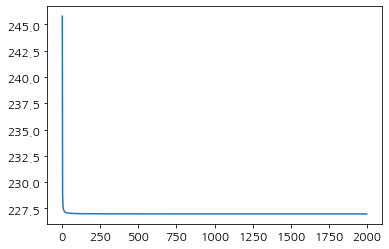

In [68]:
plt.plot(history.history['loss'])

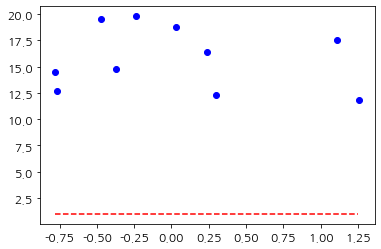

In [70]:
line_x = np.arange(min(x), max(x), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r--')
plt.plot(x, y, 'bo')
plt.show()

## TEST

In [110]:
# 자동차 연비 예측 회귀

import tensorflow as tf
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',  sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

'''
1. 결측치를 확인하시오.
2. 결측치 처리하시오.
3. Origin은 수치형이 아니고 범주형이므로 원-핫 엔코딩으로 변환하시오.
    origin이 1이면 USA 컬럼에 1.0
    origin이 2이면 Europe 컬럼에 1.0
    origin이 3이면 Japan 컬럼에 1.0
    Origin컬럼은 삭제

4. dataset에서 랜덤하게 80%는 train_data로 나머지는 test_data로 분할
5. 입력값에 대해 standardscaler을 수행하시오. 평균이 0 표준편차가 1
6. 모델을 생성하시오.    

'''

'\n1. 결측치를 확인하시오.\n2. 결측치 처리하시오.\n3. Origin은 수치형이 아니고 범주형이므로 원-핫 엔코딩으로 변환하시오.\n    origin이 1이면 USA 컬럼에 1.0\n    origin이 2이면 Europe 컬럼에 1.0\n    origin이 3이면 Japan 컬럼에 1.0\n    Origin컬럼은 삭제\n\n4. dataset에서 랜덤하게 80%는 train_data로 나머지는 test_data로 분할\n5. 입력값에 대해 standardscaler을 수행하시오. 평균이 0 표준편차가 1\n6. 모델을 생성하시오.    \n\n'

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [79]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- 결측치 확인

In [83]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

- 결측치 처리

In [91]:
dataset.loc[dataset.Horsepower.isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


------------------
다른 컬럼은 평균에 크게 벗어나는 것이 없어 정상적인 데이터라고 판단 -> Horsepower는 평균으로 채우자


In [111]:
dataset.Horsepower.fillna(dataset.Horsepower.mean(),inplace = True)

In [112]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

- Origin -> One-hot encoding

In [113]:
one_h = pd.get_dummies(dataset.Origin.replace({1:'USA', 2:'Europe',3:'Japan'}))

In [114]:
dataset.drop('Origin',axis=1,inplace=True)
dataset = pd.concat([dataset, one_h], axis=1)

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Europe        398 non-null    uint8  
 8   Japan         398 non-null    uint8  
 9   USA           398 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 23.1 KB


-  입력값에 대해 standardscaler을 수행하시오. 평균이 0 표준편차가 1

In [137]:
x= dataset.drop('MPG',axis=1)
y= dataset['MPG']

In [138]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     398 non-null    int64  
 1   Displacement  398 non-null    float64
 2   Horsepower    398 non-null    float64
 3   Weight        398 non-null    float64
 4   Acceleration  398 non-null    float64
 5   Model Year    398 non-null    int64  
 6   Europe        398 non-null    uint8  
 7   Japan         398 non-null    uint8  
 8   USA           398 non-null    uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 19.9 KB


In [145]:
stand_cols = x.columns[:-3]

In [146]:
stand_cols

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year'],
      dtype='object')

In [149]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x[stand_cols] = stand.fit_transform(x[stand_cols])

In [151]:
x.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.000000,398.000000,398.000000
mean,-5.171742e-16,-8.312725e-17,4.287469e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,0.175879,0.198492,0.625628
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,0.381197,0.399367,0.484569
min,-1.444949e+00,-1.204411e+00,-1.532571e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,0.000000,0.000000,0.000000
25%,-8.563206e-01,-8.563178e-01,-7.462258e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,0.000000,0.000000,0.000000
50%,-8.563206e-01,-4.314040e-01,-2.482070e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,0.000000,0.000000,1.000000
75%,1.498191e+00,6.584879e-01,5.381385e-01,7.538337e-01,5.834349e-01,8.096310e-01,0.000000,0.000000,1.000000
max,1.498191e+00,2.511784e+00,3.290348e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.000000,1.000000,1.000000


- dataset에서 랜덤하게 80%는 train_data로 나머지는 test_data로 분할

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [153]:
X_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
385,-0.856321,-0.983552,-0.982129,-1.153288,0.229433,1.621983,0,1,0
5,1.498191,2.262118,2.451579,1.620492,-2.021656,-1.627426,0,0,1
196,-0.856321,-0.916334,-1.165610,-0.953472,2.371599,-0.002721,0,0,1
113,0.320935,-0.368987,0.066331,-0.589310,-0.569341,-0.815074,0,0,1
293,-0.856321,-1.002757,-0.877283,-1.236052,-0.569341,0.809631,1,0,0
...,...,...,...,...,...,...,...,...,...
315,-0.856321,-0.407398,-0.379265,0.038515,1.645441,1.080415,0,0,1
328,-0.856321,-0.455410,-0.982129,0.330554,2.262675,1.080415,1,0,0
299,-0.856321,-0.503423,-0.877283,0.259614,3.351912,0.809631,1,0,0
231,1.498191,1.983643,2.241887,1.601575,-1.222883,0.268063,0,0,1


- 모델 생성


In [155]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [156]:
ridge = Ridge(alpha=10)
lasso = Ridge(alpha = 10)
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()

In [157]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
gb.fit(X_train, y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [158]:
rid_y = ridge.predict(X_test)
las_y = lasso.predict(X_test)
gb_y = gb.predict(X_test)
rf_y = rf.predict(X_test)

In [159]:
def get_mse(pred, real):
  return np.mean(np.square(pred-real))

In [167]:
model_dic = [['ridge',rid_y,], ['lasso',las_y],['gb',gb_y],['rf',rf_y]]
for i in range(4):
  print(model_dic[i][0], ' : ', get_mse(model_dic[i][1],y_test))

ridge  :  12.466895011757114
lasso  :  12.466895011757114
gb  :  7.873686100031408
rf  :  7.07454693749999
